# Social Media Sentiment Analysis for Indonesian Politicians
This notebook performs sentiment analysis on tweets related to three Indonesian politicians: Prabowo Subianto, Anies Baswedan, and Ganjar Pranowo.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Install missing packages
%pip install textblob

from textblob import TextBlob


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 KB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 KB 1.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Load the datasets

In [6]:
# Load datasets
prabowo_df = pd.read_csv('Prabowo Subianto.csv', encoding='ISO-8859-1')
anies_df = pd.read_csv('Anies Baswedan.csv', encoding='ISO-8859-1')
ganjar_df = pd.read_csv('Ganjar Pranowo.csv', encoding='ISO-8859-1')


## Clean the data

In [7]:
# Remove duplicates
prabowo_df.drop_duplicates(inplace=True)
anies_df.drop_duplicates(inplace=True)
ganjar_df.drop_duplicates(inplace=True)

# Handle missing values
prabowo_df.dropna(inplace=True)
anies_df.dropna(inplace=True)
ganjar_df.dropna(inplace=True)


## Perform sentiment analysis

In [8]:
# Define a function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
prabowo_df['Sentiment'] = prabowo_df['Tweet'].apply(get_sentiment)
anies_df['Sentiment'] = anies_df['Tweet'].apply(get_sentiment)
ganjar_df['Sentiment'] = ganjar_df['Tweet'].apply(get_sentiment)


## Visualize the sentiment distribution

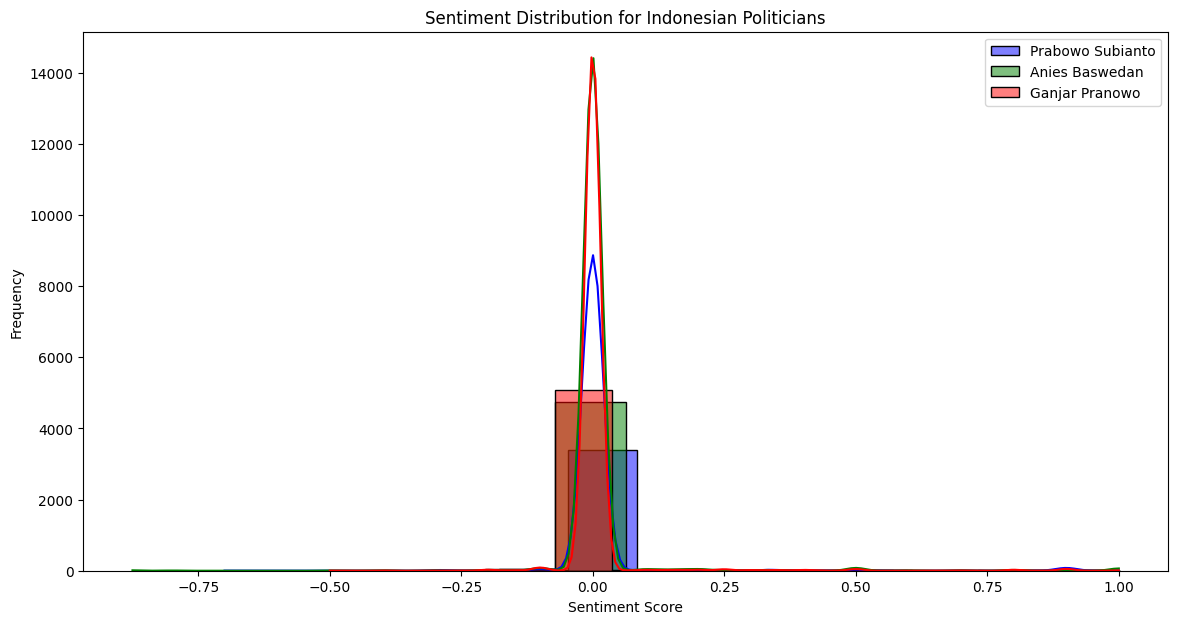

In [9]:
# Plot sentiment distribution
plt.figure(figsize=(14, 7))
sns.histplot(prabowo_df['Sentiment'], kde=True, color='blue', label='Prabowo Subianto')
sns.histplot(anies_df['Sentiment'], kde=True, color='green', label='Anies Baswedan')
sns.histplot(ganjar_df['Sentiment'], kde=True, color='red', label='Ganjar Pranowo')
plt.title('Sentiment Distribution for Indonesian Politicians')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Compare the sentiment scores

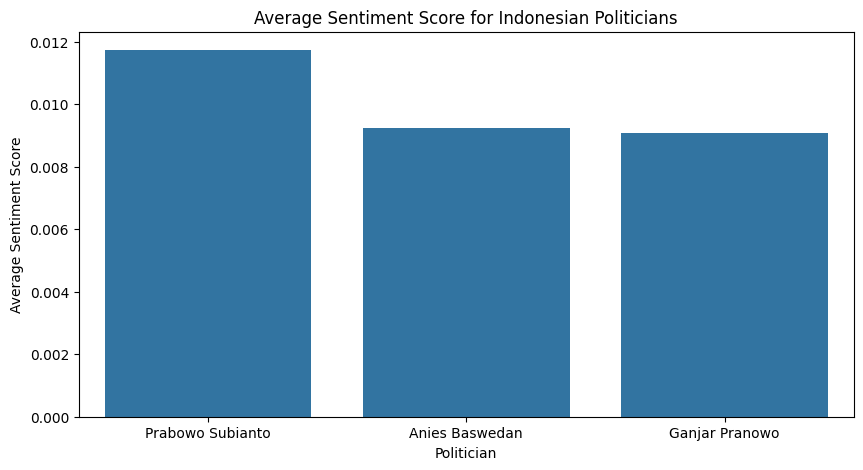

In [10]:
# Calculate average sentiment
avg_sentiment = pd.DataFrame({
    'Politician': ['Prabowo Subianto', 'Anies Baswedan', 'Ganjar Pranowo'],
    'Average Sentiment': [prabowo_df['Sentiment'].mean(), anies_df['Sentiment'].mean(), ganjar_df['Sentiment'].mean()]
})

# Plot average sentiment
plt.figure(figsize=(10, 5))
sns.barplot(x='Politician', y='Average Sentiment', data=avg_sentiment)
plt.title('Average Sentiment Score for Indonesian Politicians')
plt.xlabel('Politician')
plt.ylabel('Average Sentiment Score')
plt.show()
